# Taller 3 -Manejo de Archivos y BioPython
## Fundamentos en Biología Computacional
## 2019-1, Prof. Javier Correa

Nota: Se calificará que el código sea lo más simple, claro, original y eficiente. No usar funciones no realizadas por ustedes mismos.

Competencias: 1. Resuelve problemas de ciencias de los datos utilizando razonamiento lógico y programación en python. 2. Manipula archivos con formatos utilizados en bioinformática para extaeer información relevante. 3. Utiliza efectivamente módulos y paquetes de python especializados para biología.

Tener en cuenta: a. desarrollar y aplicar funciones en python, b. manipular archivos (entrada y salida), c. utilizar librerias especializadas (Biopython).<br>
Ejercicio:<br>

1. Un investigador desea desarrollar un Script en python, que le permita encontrar el grupo monifilético en común entre una lista de especies de plantas (archivo adjunto: lista_mercado.tsv). La información sobre la taxonomía de cada una de las especies fue descargada de la base de datos del GenBank, luego concatenada y se encuentra en formato .gb anexo <br> 

In [1]:
%%bash
cat lista_mercado.tsv

Especie	id
Quinua	63459
Tomate	4081
Oliva	4146
Yuca	3983
Papa	4113
Repollo	3712
Lechuga	4236
Durazno	3760
Piña	4615
Coco	13894
Lenteja	3864
Arveja	3888
Berenjena	4111
Garbanzo	3827


In [1]:
%%bash
head -20 Mercado.gb

LOCUS       MG859922              122198 bp    DNA     circular PLN 30-APR-2018
DEFINITION  Pisum sativum subsp. elatius isolate CE1 chloroplast, complete
            genome.
ACCESSION   MG859922
VERSION     MG859922.1
KEYWORDS    .
SOURCE      chloroplast Pisum sativum subsp. elatius
  ORGANISM  Pisum sativum subsp. elatius
            Eukaryota; Viridiplantae; Streptophyta; Embryophyta; Tracheophyta;
            Spermatophyta; Magnoliophyta; eudicotyledons; Gunneridae;
            Pentapetalae; rosids; fabids; Fabales; Fabaceae; Papilionoideae;
            Fabeae; Pisum.
REFERENCE   1  (bases 1 to 122198)
  AUTHORS   Bogdanova,V.S., Mglinets,A.V., Shatskaya,N.V., Kosterin,O.E. and
            Vasiliev,G.V.
  TITLE     Cryptic divergences in the genus Pisum L., as revealed by
            comparative analysis of complete plastid genomes
  JOURNAL   Unpublished
REFERENCE   2  (bases 1 to 122198)
  AUTHORS   Bogdanova,V.S., Mglinets,A.V., Shatskaya,N.V., Kosterin,O.E. and


#### $\rightarrow$ Con el archivo "Mercado.gb";<br>
- A. Desarrolle un script con el cual pueda extrer la información relacionada con la taxonomía de cada especie.<br>
- B. Organice esta información en una objeto tipo lista o diccionario.<br>
- C. Cree una función que reciba el objeto anterior y compare las clasificaciones entre las diferentes especies para retornar el ancestro monofilético común más reciente a todas ellas. <br> Ejemplo: Embryophyta

In [2]:
from Bio import SeqIO

mercado = list(SeqIO.parse("Mercado.gb","gb")) 
#tax_list = [plant.annotations["taxonomy"] for plant in mercado] 
tax_list = []
for plant in mercado:
    tax_list.append(plant.annotations["taxonomy"])

found = False
for i,rank in enumerate(tax_list[0]):
    for plant in tax_list:
        if plant[i] != rank:
            comun = plant[i-1]
            found = True
            break
    if found:
        break
print(comun)

Magnoliophyta


2 . El mismo investigador está ahora interesado en hacer una caracterización funcional de los genomas de los cloroplastos que poseen estas especies. Para esto y continuando con el archivo del punto anterior (Mercado.gb), resuelva las siguientes preguntas:

- A. Una forma de diferenciar una especie de otra es a través de la estimación del contenido de Guaninas y Citosinas en los genomas. Utilizando funciones de biopython responder; ¿Cuales son los valores de %GC para cada especie? retorne un diccionario con las especies como llave y su respectivo valor de %GC. Consulte el diccionario y muestre ¿Qué especie presenta el mayor %GC? ¿Y cual el más bajo? Represente los resultados en un dendograma donde se relacione las proximidades en los contenidos de %GC (puede usar Ploty, numpy, etc).

- B. Otra forma de caracterizar los genomas es estimando la frecuencia con las que aparecen los codones en los genes codificantes. Usando biopython hacer una función que me extraiga los genes codificantes para cada genoma del cloroplasto del archivo .gb, definir una función que me permita estimar la frecuencia de cada uno de los codones usados por la célula. Con las herramientas anteriores y usando funciones accesorias grafique la frecuencia de estos codones versus el codón encontrado para cada una de las especies. Finalmente, responda: ¿Qué especie presenta el codón más inusual? ¿Qué aminoácido es el mas prevalente y menos prevalente?



In [3]:
#GC = lambda x: (x.count('G')+x.count('C'))/len(x)
def GC(seq):
    return (seq.count("G")+seq.count("C"))/len(seq)

#gcs = {plant.annotations["organism"]:GC(plant.seq) for plant in mercado}
gcs = {}
for plant in mercado:
    sp = plant.annotations["organism"]
    gcs[sp] = GC(plant.seq) 

In [4]:
print(gcs)

{'Pisum sativum subsp. elatius': 0.3483117563298908, 'Solanum melongena var. insanum': 0.3771035546699235, 'Cocos nucifera': 0.374382835724441, 'Prunus persica': 0.3675961721275112, 'Cicer arietinum': 0.33906271195908044, 'Lactuca sativa': 0.37549420050794646, 'Lens culinaris': 0.3442549627135736, 'Olea europaea subsp. laperrinei': 0.37812247411569994, 'Solanum tuberosum': 0.3787344184609045, 'Ananas comosus': 0.3737314891377885, 'Chenopodium quinoa': 0.3724374706454366, 'Brassica oleracea var. capitata': 0.3636138387908663, 'Solanum lycopersicum': 0.3786184803026014, 'Manihot esculenta': 0.3587297851387091}


In [23]:
for i in gcs.values():
    print(i)

0.3483117563298908
0.3771035546699235
0.374382835724441
0.3675961721275112
0.33906271195908044
0.37549420050794646
0.3442549627135736
0.37812247411569994
0.3787344184609045
0.3737314891377885
0.3724374706454366
0.3636138387908663
0.3786184803026014
0.3587297851387091


In [5]:
def get_key(dicc,value):
    index = list(dicc.values()).index(value)
    return list(dicc.keys())[index]

maxgc = max(gcs.values())
mingc = min(gcs.values())

print(f"El mayor GC% lo tiene {get_key(gcs,maxgc)} y es {maxgc*100}")
print(f"El menor GC% lo tiene {get_key(gcs,mingc)} y es {mingc*100}")

El mayor GC% lo tiene Solanum tuberosum y es 37.87344184609045
El menor GC% lo tiene Cicer arietinum y es 33.90627119590805


Aquí graficamos el dendograma, con ayuda de [dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html), [linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage), [pdist](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist) y [expand_dims](https://docs.scipy.org/doc/numpy/reference/generated/numpy.expand_dims.html)

In [11]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import numpy as np

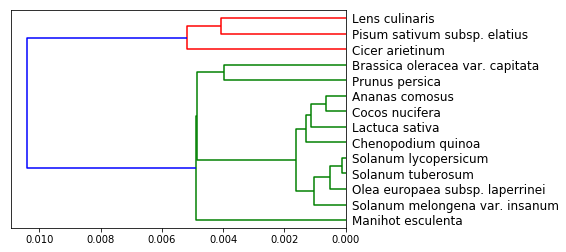

In [26]:
gc_array = np.array(list(gcs.values()))
gc_array = np.expand_dims(gc_array,-1)
ytdist = pdist(aux2)
Z = hierarchy.linkage(ytdist, 'single')
plt.figure()
dn = hierarchy.dendrogram(Z, orientation="left", labels=list(gcs.keys()))

***

In [32]:
def get_genes(record):
    genes_set = set()
    genes_dict = {}
    for ft in record.features[1:]:
        gene = ft.qualifiers.get('gene')
        if gene is None:
            continue
        else:
            gene = gene[0]
        if gene not in genes_set:
            genes_dict[gene] = ft.extract(record)
            genes_set.add(gene)
    return genes_dict

In [78]:
def get_codons(seq,frame=0):
    codons = []
    n = len(seq)
    for i in range(frame,n,3):
        if i+3 <= n:
            codons.append(seq[i:i+3])
    return codons

def get_frecs(codons):
    #cod_set = set(codons)
    frecs = {}
    for cod in codons:
        if cod not in frecs:
            frecs[str(cod)] = 1
        else:
            frecs[str(cod)] += 1
    
    # En caso de que la secuencia tenga codones ambigüos
    for cod in list(frecs.keys()):
        if "N" in cod:
            del frecs[cod]
    
    # Normalizamos las frecuencias para que se pueda comparar entre especies
    norm = sum(frecs.values())
    for cod in frecs:
        frecs[cod] = frecs[cod]/norm
    
    return frecs

In [33]:
genes = get_genes(mercado[0])

In [34]:
genes

{'rps12': SeqRecord(seq=Seq('ATGCCAACTAGAAAACAACTTATTAGAAACACAAGACAGCCAATCCGGACTGTA...TAA', IUPACAmbiguousDNA()), id='MG859922.1', name='MG859922', description='Pisum sativum subsp. elatius isolate CE1 chloroplast, complete genome', dbxrefs=[]),
 'trnH-GUG': SeqRecord(seq=Seq('GGCGAACGACGGGAATTGAACCCGCGCATGGTGGATTCACAATCCACTGCCTTG...GCC', IUPACAmbiguousDNA()), id='MG859922.1', name='MG859922', description='Pisum sativum subsp. elatius isolate CE1 chloroplast, complete genome', dbxrefs=[]),
 'psbA': SeqRecord(seq=Seq('ATGACTGCAATTTTAGAGAGACGCGATAGCGAAAACCTATGGGGTCGCTTCTGT...TAA', IUPACAmbiguousDNA()), id='<unknown id>', name='<unknown name>', description='<unknown description>', dbxrefs=[]),
 'trnK-UUU': SeqRecord(seq=Seq('GGGTTGCTAACTCAATGGTAGAGTACTCGGCTTTTAAGTGCGACTCCATTTTTT...CCA', IUPACAmbiguousDNA()), id='<unknown id>', name='<unknown name>', description='<unknown description>', dbxrefs=[]),
 'matK': SeqRecord(seq=Seq('ATGAAGGAATATCAAGTATATTTAGAACGATCTAGATCTCGCCAACAGGACTTC...TGA', 

In [35]:
get_codons(genes["rps12"].seq)

[Seq('ATG', IUPACAmbiguousDNA()),
 Seq('CCA', IUPACAmbiguousDNA()),
 Seq('ACT', IUPACAmbiguousDNA()),
 Seq('AGA', IUPACAmbiguousDNA()),
 Seq('AAA', IUPACAmbiguousDNA()),
 Seq('CAA', IUPACAmbiguousDNA()),
 Seq('CTT', IUPACAmbiguousDNA()),
 Seq('ATT', IUPACAmbiguousDNA()),
 Seq('AGA', IUPACAmbiguousDNA()),
 Seq('AAC', IUPACAmbiguousDNA()),
 Seq('ACA', IUPACAmbiguousDNA()),
 Seq('AGA', IUPACAmbiguousDNA()),
 Seq('CAG', IUPACAmbiguousDNA()),
 Seq('CCA', IUPACAmbiguousDNA()),
 Seq('ATC', IUPACAmbiguousDNA()),
 Seq('CGG', IUPACAmbiguousDNA()),
 Seq('ACT', IUPACAmbiguousDNA()),
 Seq('GTA', IUPACAmbiguousDNA()),
 Seq('ACA', IUPACAmbiguousDNA()),
 Seq('AAA', IUPACAmbiguousDNA()),
 Seq('TCT', IUPACAmbiguousDNA()),
 Seq('CCC', IUPACAmbiguousDNA()),
 Seq('GCT', IUPACAmbiguousDNA()),
 Seq('CTT', IUPACAmbiguousDNA()),
 Seq('CGG', IUPACAmbiguousDNA()),
 Seq('GGA', IUPACAmbiguousDNA()),
 Seq('TGC', IUPACAmbiguousDNA()),
 Seq('CCT', IUPACAmbiguousDNA()),
 Seq('CAA', IUPACAmbiguousDNA()),
 Seq('CGC', IU

In [260]:
len(get_codons(genes["rps12"].seq))

128

In [79]:
frec_ex = get_frecs(get_codons(mercado[0].seq))

/home/sivico26/miniconda3/lib/python3.6/site-packages/Bio/Seq.py:163: BiopythonWarning: Biopython Seq objects now use string comparison. Older versions of Biopython used object comparison. During this transition, please use hash(id(my_seq)) or my_dict[id(my_seq)] if you want the old behaviour, or use hash(str(my_seq)) or my_dict[str(my_seq)] for the new string hashing behaviour.
  "the new string hashing behaviour.", BiopythonWarning)


In [81]:
frec_ex

{'GGC': 0.005033886651605933,
 'GAA': 0.02615165504370887,
 'CGA': 0.009674884588940183,
 'CGG': 0.006580885964050683,
 'TTG': 0.02146154601709066,
 'AAC': 0.014512326883410274,
 'CCG': 0.006458108240840782,
 'CGC': 0.004469109124840389,
 'ATG': 0.01699243689225027,
 'GTG': 0.006777330321186524,
 'GAT': 0.01991454670464591,
 'TCA': 0.019742657892152047,
 'CAA': 0.021289657204596798,
 'TCC': 0.01532265985659562,
 'ACT': 0.013431882919163148,
 'GCC': 0.005500441999803556,
 'ATC': 0.02006187997249779,
 'CAC': 0.008054218642569493,
 'GCT': 0.008471662901483155,
 'ACA': 0.013259994106669285,
 'CTC': 0.011197328356742952,
 'TAA': 0.025193988802671645,
 'CTA': 0.016525881544052646,
 'TGT': 0.013014438660249485,
 'AAT': 0.03661231706119242,
 'TAC': 0.013751104999508889,
 'ATA': 0.032634318829191634,
 'TTT': 0.05082997740889893,
 'TAT': 0.03290442982025341,
 'ACC': 0.010386995383557607,
 'TTA': 0.024923877811609863,
 'TTC': 0.02799332089185738,
 'TCT': 0.022983989784893428,
 'CTT': 0.0201601021

In [80]:
sum(frec_ex.values())

1.0

In [85]:
get_codons(mercado[0].seq)[1].translate(table=11)

Seq('E', ExtendedIUPACProtein())

1.5625

In [82]:
for plant in mercado:
    print(len(get_frecs(get_codons(plant.seq))))

/home/sivico26/miniconda3/lib/python3.6/site-packages/Bio/Seq.py:163: BiopythonWarning: Biopython Seq objects now use string comparison. Older versions of Biopython used object comparison. During this transition, please use hash(id(my_seq)) or my_dict[id(my_seq)] if you want the old behaviour, or use hash(str(my_seq)) or my_dict[str(my_seq)] for the new string hashing behaviour.
  "the new string hashing behaviour.", BiopythonWarning)


64
64
64
64
64
64
64
64
64
64
64
64
64
64


In [57]:
for plant in mercado:
    print(len(plant.seq))

122198
155570
154740
157790
125319
152772
122967
155886
155312
159636
151169
153366
155452
161453


In [37]:
for i in set(get_codons(genes["rps12"].seq)):
    print(i)

CGG
ATG
TTA
CTT
ATC
CCT
GCC
CCA
GTG
CGT
AAA
CAT
ACA
ATT
TCT
TCA
GGC
GAT
TGT
GCT
GGA
ATA
AAT
CGC
TAA
TTT
CAA
ACT
GAA
CAC
AAG
AGA
TAT
CTC
GCG
GTC
GGG
CAG
AGG
GGT
TGC
AAC
GCA
GTA
CCC
ACC
GTT
CTG
CGA


/home/sivico26/miniconda3/lib/python3.6/site-packages/Bio/Seq.py:163: BiopythonWarning: Biopython Seq objects now use string comparison. Older versions of Biopython used object comparison. During this transition, please use hash(id(my_seq)) or my_dict[id(my_seq)] if you want the old behaviour, or use hash(str(my_seq)) or my_dict[str(my_seq)] for the new string hashing behaviour.
  "the new string hashing behaviour.", BiopythonWarning)


In [167]:
rec = mercado[1]

In [177]:
len(rec.features)

338

In [225]:
for ft in rec.features[1:]:
    print(ft.qualifiers)

OrderedDict([('gene', ['rps12']), ('trans_splicing', [''])])
OrderedDict([('gene', ['rps12']), ('trans_splicing', ['']), ('codon_start', ['1']), ('transl_table', ['11']), ('product', ['ribosomal protein S12']), ('protein_id', ['AXQ38216.1']), ('translation', ['MPTIKQLIRNTRQPIRNVTKSPALRGCPQRRGTCTRVYTITPKKPNSALRKVARVRLTSGFEITAYIPGIGHNLQEHSVVLVRGGRVKDLPGVRYHIVRGTLDAVGVKDRQQGRSKYGVKKPK'])])
OrderedDict([('gene', ['trnH'])])
OrderedDict([('gene', ['trnH']), ('product', ['tRNA-His'])])
OrderedDict([('gene', ['psbA'])])
OrderedDict([('gene', ['psbA']), ('codon_start', ['1']), ('transl_table', ['11']), ('product', ['photosystem II protein D1']), ('protein_id', ['AXQ38247.1']), ('translation', ['MTAILERRESESLWGRFCNWITSTENRLYIGWFGVLMIPTLLTATSVFIIAFIAAPPVDIDGIREPVSGSLLYGNNIISGAIIPTSAAIGLHFYPIWEAASVDEWLYNGGPYELIVLHFLLGVACYMGREWELSFRLGMRPWIAVAYSAPVAAATAVFLIYPIGQGSFSDGMPLGISGTFNFMIVFQAEHNILMHPFHMLGVAGVFGGSLFSAMHGSLVTSSLIRETTENESANEGYRFGQEEETYNIVAAHGYFGRLIFQYASFNNSRSLHFFLAAWPVVGIWFTALGISTMAFNLNGFNFNQ

In [87]:
import seaborn as sns
sns.set()

In [88]:
exercise = sns.load_dataset("exercise")

In [89]:
type(exercise)

pandas.core.frame.DataFrame

In [90]:
exercise.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


***

In [38]:
import itertools as it

In [51]:
# Con Biopython
def count_bp(archivo,formato):
    from Bio import SeqIO
    records = SeqIO.parse(archivo,formato)
    return sum(len(read) for read in records)
def count_reads(archivo,formato):
    from Bio import SeqIO
    records = SeqIO.parse(archivo,formato)
    return sum(1 for read in records)

In [44]:
bases = count_bp("../../Biopython/reads.fastq", "fastq")
nreads = count_reads("../../Biopython/reads.fastq", "fastq")
print(f'Cantidad de información: {bases} bp')
print(f'Número de reads: {nreads}')
print(f'Longitud promedio: {bases/nreads} bp')

Cantidad de información: 98574 bp
Número de reads: 1000
Longitud promedio: 98.574 bp


In [72]:
# Sin Biopython
def count_bp2(archivo,step=4):
    import itertools as it
    f = open(archivo,"r")
    bases = sum(len(line.strip("\n")) for line in it.islice(f,1,None,step))
    f.close()
    return bases
def count_reads2(archivo,step=4):
    import itertools as it
    f = open(archivo,"r")
    nreads = sum(1 for line in it.islice(f,1,None,step))
    f.close()
    return nreads

def len_prom(archivo,step=4):
    import itertools as it
    with open(archivo,"r") as f:
        bases = ((len(line.strip("\n")),1) for line in it.islice(f,1,None,step))
    return bases

In [74]:
bases = count_bp2("../../Biopython/reads.fastq")
nreads = count_reads2("../../Biopython/reads.fastq")
print(f'Cantidad de información: {bases} bp')
print(f'Número de reads: {nreads}')
print(f'Longitud promedio: {bases/nreads} bp')

Cantidad de información: 98574 bp
Número de reads: 1000
Longitud promedio: 98.574 bp


In [146]:
%%time
import itertools as it
import os

def generate_filenames(folder):
    """
    generates a sequence of opened files
    matching a specific extension
    """
    for dir_path, dir_names, file_names in os.walk(folder):
        for file_name in file_names:
            if file_name.endswith('.fastq'):
                yield open(os.path.join(dir_path, file_name))

def cat_files(files):
    """
    takes in an iterable of filenames
    """
    for fname in files:
        for line in fname:
            yield line
            
def count_bp3(lines,step=4):
    bases = sum(len(line.strip("\n")) for line in it.islice(lines,1,None,step))
    return bases

def count_reads3(lines,step=4):
    nreads = sum(1 for line in it.islice(lines,1,None,step))
    return nreads

folder = "../../Biopython"

bases = count_bp3(cat_files(generate_filenames(folder)))
nreads = count_reads3(cat_files(generate_filenames(folder)))
print(f'Cantidad de información: {bases/1000000} Mbp')
print(f'Número de reads: {nreads}')
print(f'Longitud promedio: {bases/nreads} bp')


Cantidad de información: 0.098574 Mbp
Número de reads: 1000
Longitud promedio: 98.574 bp
CPU times: user 4.21 ms, sys: 127 µs, total: 4.33 ms
Wall time: 3.58 ms


In [164]:
%%time
import itertools as it
import os

def generate_filenames(folder):
    """
    generates a sequence of opened files
    matching a specific extension
    """
    for dir_path, dir_names, file_names in os.walk(folder):
        for file_name in file_names:
            if file_name.endswith('.fastq'):
                yield open(os.path.join(dir_path, file_name))

def cat_files(files):
    """
    takes in an iterable of filenames
    """
    for fname in files:
        for line in fname:
            yield line

def reads_stats(lines,step=4):
    len_read = lambda read: len(read.rstrip("\n"))
    road = ((len_read(line),1) for line in it.islice(lines,1,None,step))
    bases, nreads = map(sum, zip(*road))
    return bases, nreads

folder = "../../Biopython"

bases,nreads = reads_stats(cat_files(generate_filenames(folder)))
print(f'Cantidad de información: {bases/1000000} Mbp')
print(f'Número de reads: {nreads}')
print(f'Longitud promedio: {bases/nreads} bp')

Cantidad de información: 0.098574 Mbp
Número de reads: 1000
Longitud promedio: 98.574 bp
CPU times: user 4.22 ms, sys: 76 µs, total: 4.29 ms
Wall time: 3.31 ms


In [104]:
aux = [(i,1) for i in "ABCDEF"]

In [120]:
list(zip(*((i,1) for i in "ABCDEF")))

[('A', 'B', 'C', 'D', 'E', 'F'), (1, 1, 1, 1, 1, 1)]

In [123]:
list(it.islice(((i,1) for i in "ABCDEF"),1,None,2))

[('B', 1), ('D', 1), ('F', 1)]

In [71]:
bases = count_bp2("../../Biopython/reads.fastq")
print(bases)

98574


In [69]:
import itertools as it
f = open("../../Biopython/reads.fastq","r")
handle =(len(line.strip("\n")) for line in it.islice(f,1,None,4))
for i in handle:
    print(i)

101
101
101
101
101
101
101
101
101
101
58
101
101
91
101
101
101
59
101
101
101
101
101
101
101
44
101
101
101
101
101
101
101
101
48
101
101
101
101
101
101
100
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
81
101
101
101
101
101
101
101
101
101
98
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
100
101
101
101
101
101
101
101
101
43
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
99
101
101
101
101
101
101
101
101
101
101
101
101
63
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
100
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
100
101
100
101
101
101
101
101
100
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
59
101
101
101
101
101
101
101
101
101
101
101
101
52
101
101


In [89]:
string = "ABCDEFGHIJ"
test = enumerate(string)

sum(it.islice(test,1,None,2))

TypeError: unsupported operand type(s) for +: 'int' and 'tuple'

In [94]:
string = "ABCDEFGHIJ"
test = list(enumerate(string))

#print(test)
sum(it.islice(*test,None,2))

TypeError: islice expected at most 4 arguments, got 12